In [1]:
import pandas as pd
import numpy as np
from reliability.Distributions import Weibull_Distribution
import matplotlib.pyplot as plt

In [2]:
a = [83.25, 85, 146.75,107.5,116.666,130.75,178.333, 97.5, 123.25, 90, 141.666, 107.5]

In [3]:
l = 0.008
t = 0.0016
w = 0.003

b = []

for i in a:
    b.append((i*l)/(w*t*t))

In [4]:
b

[86718749.99999999,
 88541666.66666666,
 152864583.33333328,
 111979166.66666664,
 121527083.33333331,
 136197916.66666666,
 185763541.66666663,
 101562499.99999999,
 128385416.66666664,
 93749999.99999997,
 147568749.99999994,
 111979166.66666664]

In [5]:
df = pd.DataFrame()
df['a'] = a
df['b'] = b

In [6]:
df = df.sort_values('a')

In [7]:
df

,a,b
0,83.25,8.67187e+07
1,85,8.85417e+07
9,90,9.375e+07
7,97.5,1.01562e+08
3,107.5,1.11979e+08
11,107.5,1.11979e+08
4,116.666,1.21527e+08
8,123.25,1.28385e+08
5,130.75,1.36198e+08
10,141.666,1.47569e+08


In [8]:
p = []

for i in range(len(df['a'])):
    p.append((i+1)/(13))

In [9]:
p

[0.07692307692307693,
 0.15384615384615385,
 0.23076923076923078,
 0.3076923076923077,
 0.38461538461538464,
 0.46153846153846156,
 0.5384615384615384,
 0.6153846153846154,
 0.6923076923076923,
 0.7692307692307693,
 0.8461538461538461,
 0.9230769230769231]

In [10]:
y = []

for i in p:
    y.append(np.log(np.log(1/(1-i))))

In [11]:
y

[-2.52519494083409,
 -1.789437658738315,
 -1.3380214184293209,
 -1.0004205007092843,
 -0.7225598929628262,
 -0.47958666677489836,
 -0.2572306095484253,
 -0.045508537322853454,
 0.16437395476441694,
 0.38276750117881114,
 0.6269016977393765,
 0.9419387347481114]

In [12]:
x = []

for i in df['b']:
    x.append(np.log(i))

In [13]:
x

[18.27818068134508,
 18.298983808974846,
 18.356142222814793,
 18.43618493048833,
 18.533823400052245,
 18.533823400052245,
 18.615647703997837,
 18.67054736540733,
 18.729619655429563,
 18.80980472684741,
 18.845063011192735,
 19.0399851415518]

In [14]:
res = np.polyfit(x,y,1)
res

array([  4.20110887, -78.62585045])

In [15]:
sig = np.exp(-res[1]/res[0])
sig

134288279.21099243

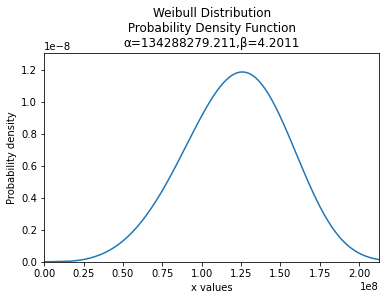

In [16]:

dist = Weibull_Distribution(alpha=134288279.21099243, beta=4.20110887)  # this created the distribution object
dist.PDF()  # this creates the plot of the PDF
plt.show()